In [1]:
import SpectralSynthesis as ss
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
H_list = [0,0.5,1]
SEED = 42
N = 1000
E=1

In [3]:
df = pd.DataFrame()
df['H'] = H_list
df['seed'] = [SEED]*len(H_list)
df['N'] = [N]*len(H_list)
df['E'] = [E]*len(H_list)
df

,H,seed,N,E
0,0.0,42,1000,1
1,0.5,42,1000,1
2,1.0,42,1000,1


c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)
c:\Github\thesis-images\SpectralSynthesis.py:58: RuntimeWarning: divide by zero encountered in reciprocal
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


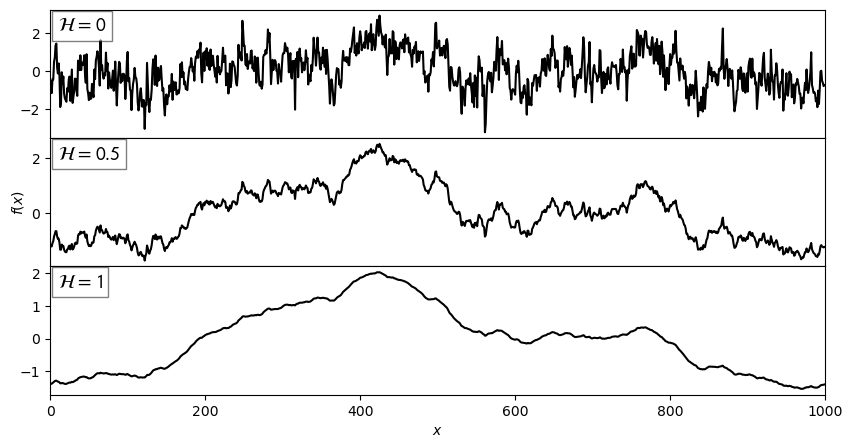

,H,seed,N,E
0,0.0,42,1000,1
1,0.5,42,1000,1
2,1.0,42,1000,1


In [4]:
props = dict(facecolor='white', alpha=0.5)

f,ax = plt.subplots(3,1, figsize = (10,5))

X_list = []
A_list = []
phases = []
rads = []

for i, H in enumerate(H_list):
    X = ss.fBm(N=N, E=E, H=H, exp=False, centred = False, seed=SEED)
    ax[i].plot(X, c='k')
    ax[i].text(0.01, 0.95, fr'$\cal H={H}$', transform=ax[i].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax[i].set_xlim(0,N)
    
    #phases.append(phase)
    #rads.append(rad)
    X_list.append(X)
    #A_list.append(A)

ax[0].set_xticks([])
ax[1].set_xticks([])
f.subplots_adjust(wspace=0, hspace=0)

plt.xlabel(r'$x$')
ax[1].set_ylabel(r'$f(x)$')
plt.xlim(0,N)
plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/1DfBm.png', bbox_inches = 'tight')
plt.show()

# df['X'] = X_list
# df['A'] = A_list
# df['phases'] = phases
# df['amplitudes'] = rads
df 

C:\Users\Matt\AppData\Local\Temp\ipykernel_31536\3786056577.py:9: RuntimeWarning: divide by zero encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_31536\3786056577.py:9: RuntimeWarning: invalid value encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_31536\3786056577.py:9: RuntimeWarning: divide by zero encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_31536\3786056577.py:9: RuntimeWarning: invalid value encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_31536\3786056577.py:9: RuntimeWarning: divide by zero encountered in log10
  df['x'] = np.log10(k)
C:\Users\Matt\AppData\Local\Temp\ipykernel_31536\3786056577.py:9: RuntimeWarning: invalid value encountered in log10
  df['x'] = np.log10(k)


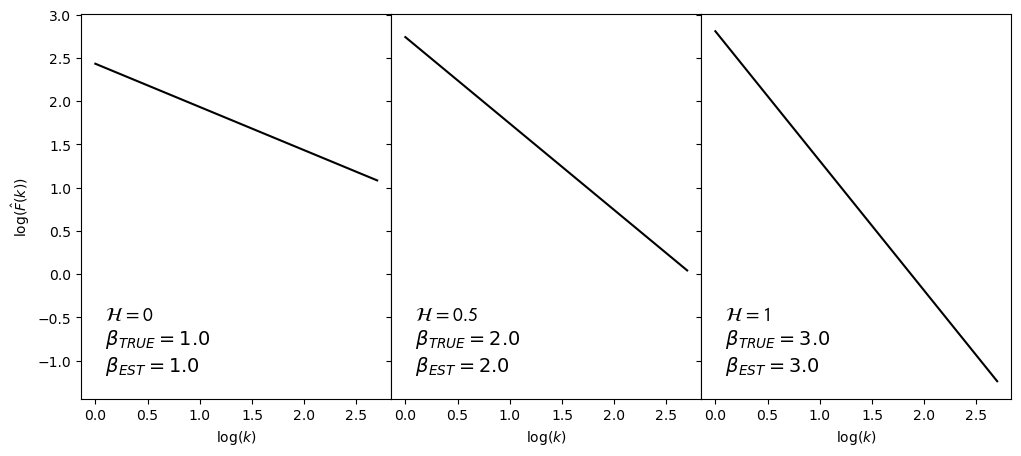

In [37]:
f,ax = plt.subplots(1,3, figsize = (12,5), sharey=True)
k = np.arange(-N/2, N/2)

for i in range(len(X_list)):
    ps = np.fft.fftn(X_list[i])
    
    df = pd.DataFrame()
    df['y'] = np.log10(np.abs(np.fft.fftshift(ps)))
    df['x'] = np.log10(k)
    df=df.replace([np.inf, -np.inf], np.nan).dropna()
    
    beta_est = -2*(df['y'].iloc[-1]-df['y'].iloc[0])/(df['x'].iloc[-1]-df['x'].iloc[0])
    
    text = fr"""
    $\cal H={H_list[i]}$
    $\beta_{{TRUE}} = {E+2*H_list[i]:.1f}$
    $\beta_{{EST}} = {beta_est:.1f}$
    """

    ax[i].plot(df['x'],df['y'], c='k')
    ax[i].text(0.0, 0.3, text, transform=ax[i].transAxes, fontsize=14,
        verticalalignment='top')
    ax[i].set_xlabel(r'$\log(k)$')

ax[0].set_ylabel(r'$\log(\hat{F}(k))$')

f.subplots_adjust(wspace=0, hspace=0)
plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/Power Spectrum measured of 1DfBm.png', bbox_inches = 'tight')
plt.show()

[-500. -499. -498. ...  498.  499.  500.]
[-500. -499. -498. ...  498.  499.  500.]
[-500. -499. -498. ...  498.  499.  500.]
Text(400.0, 0, '400')


c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
c:\Users\Matt\.conda\envs\astronomy\lib\site-packages\ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator


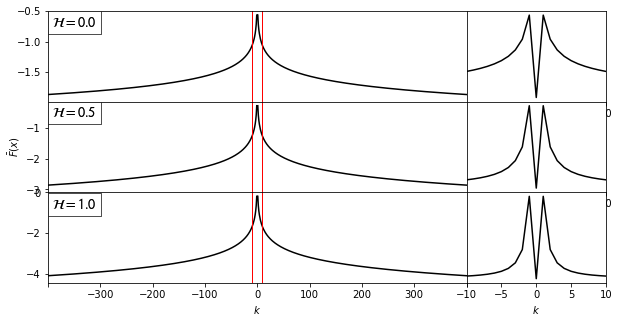

In [6]:
f,ax = plt.subplots(3,2, figsize = (10,5), gridspec_kw={'width_ratios': [3, 1]})

zoom_values = (-10,10)

for i, row in df.iterrows():
    PS = np.fft.fftn(X)
    k = np.arange(-N/2, N/2+1)
    print(k)
    ax[i,0].plot(k,np.log10(row['amplitudes']), c='k')
    ax[i,0].text(0.01, 0.95, fr'$\cal H={row["H"]}$', transform=ax[i,0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax[i,0].axvline(zoom_values[0], c='r', linewidth=1)
    ax[i,0].axvline(zoom_values[1], c='r', linewidth=1)
    ax[i,0].set_xlim(-400,400)

    ax[i,1].plot(k,row['amplitudes'], c='k')
    ax[i,1].text(0.01, 0.95, fr'$\cal H={row["H"]}$', transform=ax[i,0].transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
    ax[i,1].set_xlim(*zoom_values)

    ax[i,1].set_yticks([])

ax[0,0].set_xticks([])
ax[1,0].set_xticks([])
plt.gcf().canvas.draw()
labels = ax[2,0].get_xticklabels()
print(labels[-1])
labels[-1] = labels[0] = ''
ax[2,0].set_xticklabels(labels)
f.subplots_adjust(wspace=0, hspace=0)

ax[2,0].set_xlabel(r'$k$')
ax[2,1].set_xlabel(r'$k$')
ax[1,0].set_ylabel(r'$\bar F(x)$')
#plt.savefig('D:/Workshop/PhD/Thesis/Chapter 2/Power Spectrum measured of 1DfBm.png', bbox_inches = 'tight')
plt.show()